## Pre-processing GSE10694 (human hepatocellular carcinoma, normalized series matrix)

The script allows to pre-process **GSE10694** series matrix acquired from GEO data base.
<br>
<br>
**GSE10694** data set consists of **166 samples**: 
* 78 positive samples, 
* 78 negative samples (adjacent to the positive - coming from the same patient from surrounding healthy tissue) 
* and 10 negative samples not adjacent to the positive (coming from 10 other patients).
<br>

**For detailed information please refer to:** https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE10694
<br>

**Related publication:**
<br>
Li W, Xie L, He X, Li J et al. *Diagnostic and prognostic implications of microRNAs in human hepatocellular carcinoma.* Int J Cancer 2008 Oct 1;123(7):1616-22. (DOI: 10.1002/ijc.23693)

**Before you start:**
* The code is writen in **R**.
* **Download** and unzip series matrix first: 
https://ftp.ncbi.nlm.nih.gov/geo/series/GSE10nnn/GSE10694/matrix/GSE10694_series_matrix.txt.gz
* **Required libraries**: *GEOquery*, *repr*

The code is written by @MelaniaNowicka, Free University of Berlin (contact: melania.nowicka@gmail.com).

**Import necessary libraries**

In [1]:
# read required libraries
library("GEOquery")
library("repr")

# read utility functions
source("utility-functions.R")

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Welcome to Bioconductor

    Vignettes contain introductory material; view with


**Read GEO data from series matrix using getGEO()**

In [2]:
# get the data from series matrix using getGEO()
print("Reading data...")
data <- getGEO(filename="GSE10694_series_matrix.txt")

[1] "Reading data..."


Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.
File stored at: 
C:\Users\melan\AppData\Local\Temp\RtmpyQumUu/GPL6542.soft


**Extract count matrix**

In [3]:
# get count.matrix
count.matrix <- exprs(object = data)
# show matrix
head(count.matrix)

,GSM270322,GSM270323,GSM270324,GSM270325,GSM270326,GSM270327,GSM270328,GSM270329,GSM270330,GSM270331,...,GSM270478,GSM270479,GSM270480,GSM270481,GSM270482,GSM270483,GSM270484,GSM270485,GSM270486,GSM270487
51,13.05489,13.09177,12.92098,13.61852,12.20897,12.89651,13.40010,14.14759,13.19490,12.79481,...,13.12685,12.07961,13.14869,13.36025,12.74142,12.23462,13.30081,12.91185,13.03710,12.57625
57,14.01204,12.52381,12.85989,12.72957,14.67958,13.94312,14.80385,13.66850,13.67336,12.43266,...,13.92530,13.09487,13.75179,13.36130,13.85862,13.31886,13.58748,13.72978,13.46098,13.38841
61,12.03151,11.64092,12.94748,10.64386,10.64386,12.93495,10.64386,12.16838,11.34830,11.49908,...,12.35620,11.25341,12.66290,10.64386,11.07527,10.64386,10.64386,11.36454,12.40520,11.89766
84,13.79079,13.73171,13.36048,13.78560,14.36283,15.29407,14.15871,14.53694,14.06656,13.96612,...,13.02263,11.81300,12.78457,10.64386,12.48335,10.64386,11.51356,12.38109,12.98608,13.39461
90,10.81468,11.04381,11.11316,12.44676,10.64386,11.38410,10.64386,10.80933,10.90665,11.39864,...,10.64386,10.64386,10.64386,10.64386,10.64386,10.64386,10.64386,11.07192,10.64386,10.64386
93,14.88182,14.35767,13.94856,15.23261,15.36760,15.36549,14.69739,14.47369,14.27968,14.39144,...,13.86183,13.65795,13.78434,12.71182,14.19837,13.72260,13.59386,13.98536,14.59712,14.38816


**Extract important information about samples and miRNAs**

In [4]:
# replace miRNA ID row names with miRNA tags
rownames(count.matrix) <- data@featureData@data$miRNA_ID
# count features and samples
original.data.row.numb <- nrow(count.matrix)
print(paste("Number of samples: ", ncol(count.matrix)))
print(paste("Number of features: ", original.data.row.numb))
# show matrix
head(count.matrix)

[1] "Number of samples:  166"
[1] "Number of features:  121"


,GSM270322,GSM270323,GSM270324,GSM270325,GSM270326,GSM270327,GSM270328,GSM270329,GSM270330,GSM270331,...,GSM270478,GSM270479,GSM270480,GSM270481,GSM270482,GSM270483,GSM270484,GSM270485,GSM270486,GSM270487
hsa-miR-30a-5p,13.05489,13.09177,12.92098,13.61852,12.20897,12.89651,13.40010,14.14759,13.19490,12.79481,...,13.12685,12.07961,13.14869,13.36025,12.74142,12.23462,13.30081,12.91185,13.03710,12.57625
hsa-miR-106a,14.01204,12.52381,12.85989,12.72957,14.67958,13.94312,14.80385,13.66850,13.67336,12.43266,...,13.92530,13.09487,13.75179,13.36130,13.85862,13.31886,13.58748,13.72978,13.46098,13.38841
hsa-miR-10a,12.03151,11.64092,12.94748,10.64386,10.64386,12.93495,10.64386,12.16838,11.34830,11.49908,...,12.35620,11.25341,12.66290,10.64386,11.07527,10.64386,10.64386,11.36454,12.40520,11.89766
hsa-miR-191,13.79079,13.73171,13.36048,13.78560,14.36283,15.29407,14.15871,14.53694,14.06656,13.96612,...,13.02263,11.81300,12.78457,10.64386,12.48335,10.64386,11.51356,12.38109,12.98608,13.39461
hsa-miR-98,10.81468,11.04381,11.11316,12.44676,10.64386,11.38410,10.64386,10.80933,10.90665,11.39864,...,10.64386,10.64386,10.64386,10.64386,10.64386,10.64386,10.64386,11.07192,10.64386,10.64386
hsa-miR-107,14.88182,14.35767,13.94856,15.23261,15.36760,15.36549,14.69739,14.47369,14.27968,14.39144,...,13.86183,13.65795,13.78434,12.71182,14.19837,13.72260,13.59386,13.98536,14.59712,14.38816


**Show information about sample source**

First 78 samples come from the primary liver cancer, samples 79-156 come from the corresponding noncancerous liver tissue, samples 157-166 come from normal liver tissue.

In [5]:
print("Classes in the series matrix: ")
samples <- as.data.frame(table(data@phenoData@data$source_name_ch1))
colnames(samples) <- c("Sample source", "Frequency")
samples

[1] "Classes in the series matrix: "


Sample source,Frequency
corresponding noncancerous liver tissue,78
normal liver tissue,10
primary liver cancer,78


**Filter non-paired samples**

Remove samples accquired from normal liver tissue with IDs: GSM270478, GSM270479, GSM270480, GSM270481, GSM270482, GSM270483, GSM270484, GSM270485, GSM270486, GSM270487, to ensure identical number of positive and negative samples in the data set. 

In [6]:
count.matrix.pos <- count.matrix[,1:78]
print(paste("Number of positive samples (primary liver cancer): ", ncol(count.matrix.pos)))
count.matrix.neg <- count.matrix[,79:156]
print(paste("Number of negative samples (corresponding noncancerous liver tissue): ", ncol(count.matrix.neg)))

# move negative samples first, positive samples next
count.matrix <- cbind(count.matrix.neg, count.matrix.pos)
head(count.matrix)

[1] "Number of positive samples (primary liver cancer):  78"
[1] "Number of negative samples (corresponding noncancerous liver tissue):  78"


,GSM270400,GSM270401,GSM270402,GSM270403,GSM270404,GSM270405,GSM270406,GSM270407,GSM270408,GSM270409,...,GSM270390,GSM270391,GSM270392,GSM270393,GSM270394,GSM270395,GSM270396,GSM270397,GSM270398,GSM270399
hsa-miR-30a-5p,13.02596,13.22960,13.11578,12.99818,12.98529,12.80859,13.24748,12.94319,13.11888,12.90118,...,12.27490,12.10252,13.36426,13.08291,13.13636,14.29878,12.24056,13.09897,12.17431,12.34582
hsa-miR-106a,13.51516,11.93060,12.78182,12.83071,13.00936,13.03983,13.60481,13.36835,12.75477,13.02259,...,14.15516,13.70305,13.50575,13.41761,13.91474,13.30768,14.50756,14.42796,14.33824,14.26747
hsa-miR-10a,12.74411,11.54517,12.91532,10.94535,11.94499,12.90203,12.23167,11.88129,12.04903,12.10002,...,12.67592,11.85021,12.35871,12.71151,12.87379,10.64386,10.64386,10.73437,10.64386,10.64386
hsa-miR-191,14.06239,13.62292,13.27316,12.20704,13.35484,13.45406,13.57834,13.58346,12.75062,13.34721,...,14.30843,14.71676,13.06058,13.10423,13.83193,14.81216,14.81261,13.75538,14.46138,13.45752
hsa-miR-98,10.72953,10.67373,10.64386,10.96187,10.64386,10.74283,10.64386,10.64386,10.72744,10.75794,...,10.70350,10.68230,10.64386,10.97632,11.36431,10.64386,10.64386,11.43065,10.64386,11.20727
hsa-miR-107,14.63122,14.16116,14.18407,13.86149,14.55219,14.18123,14.17510,14.76708,13.92566,14.41730,...,15.51684,15.27403,14.28605,13.95753,14.45216,14.05685,14.34720,14.33169,15.25434,14.71628


**Show boxplot for all samples**

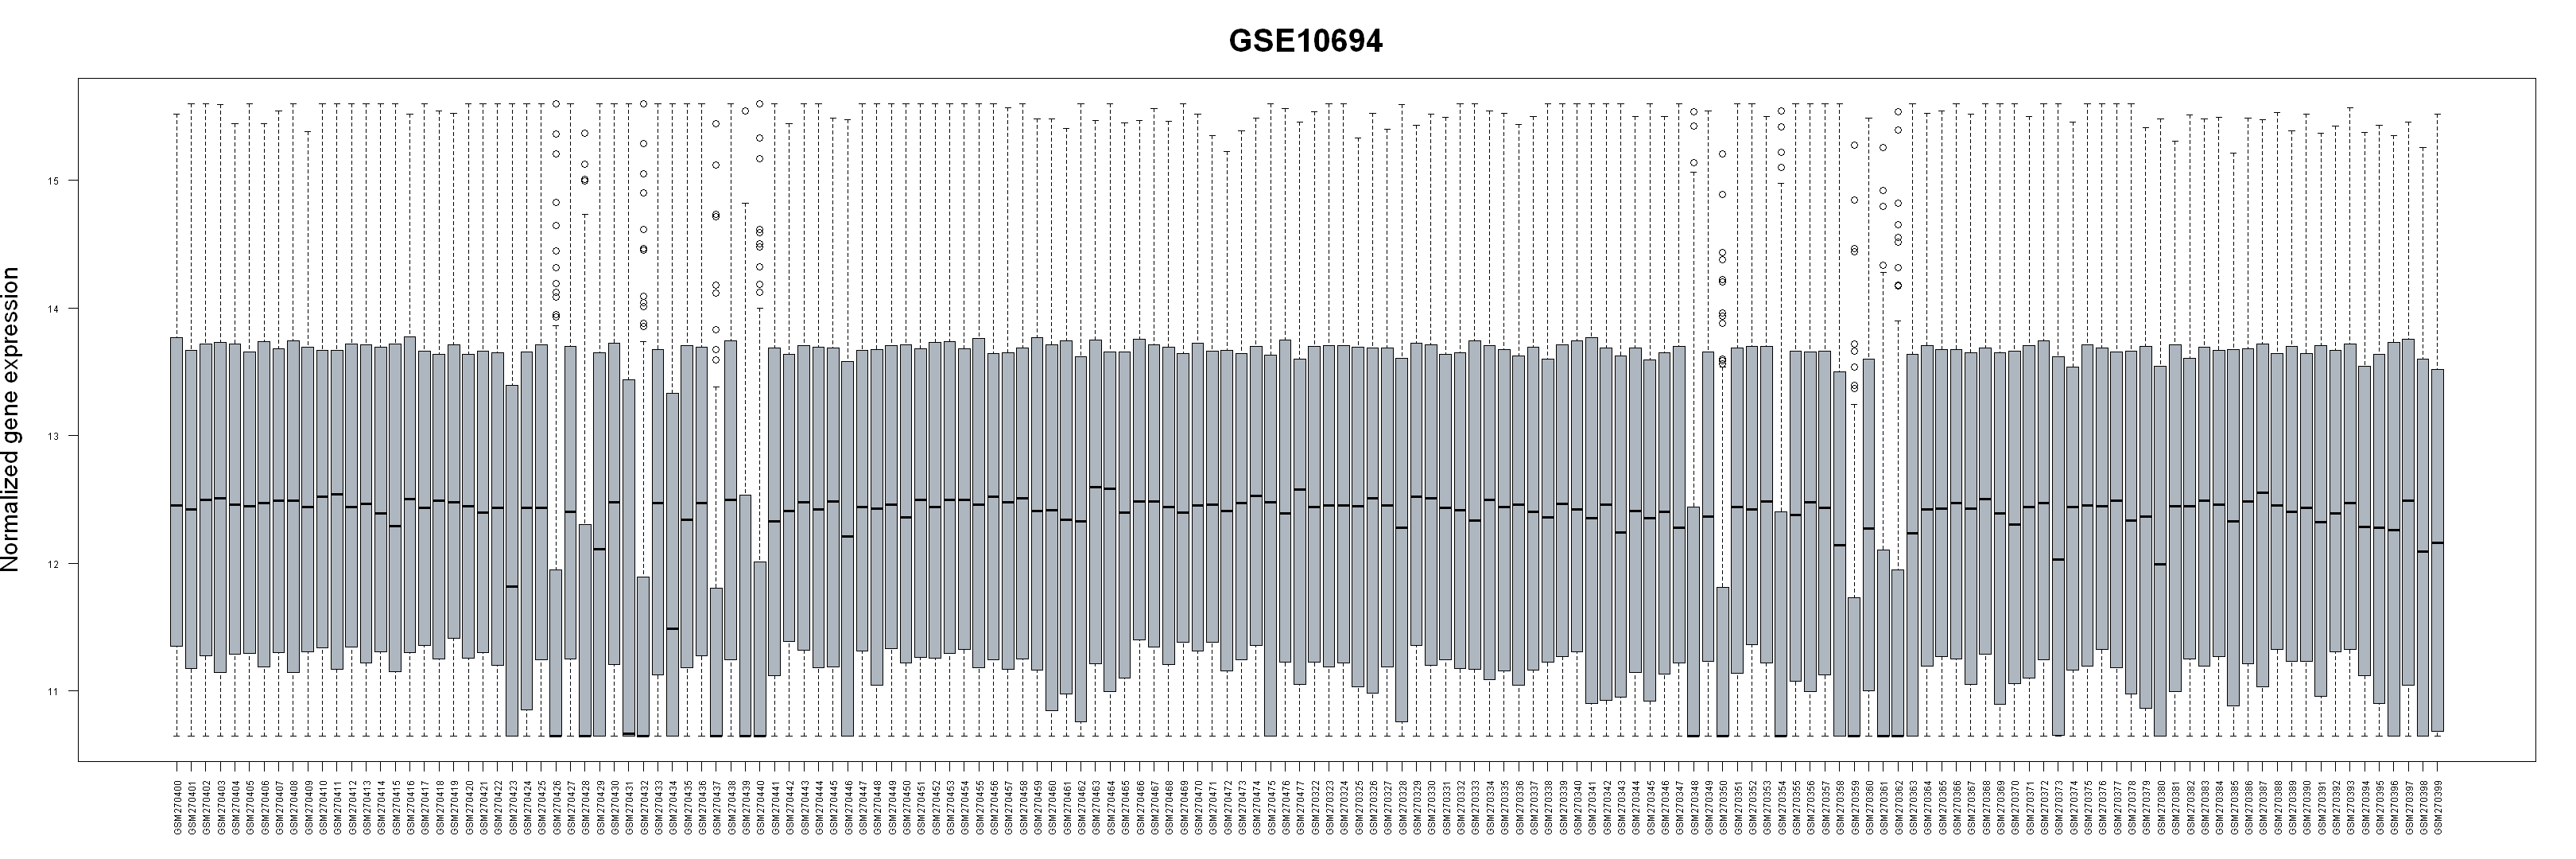

In [7]:
# show boxplot for all samples
options(repr.plot.width=27, repr.plot.height=9)
#jpeg(file="GSE10694_all_bf.jpeg", width=1500, height=500)
boxplot(count.matrix, col = "#AEB6BF", cex.main=2, cex.lab=1.5, cex.axis=0.6, las = 2, main="GSE10694", ylab="Normalized gene expression")
#dev.off()

**Show boxplots for positive and negative samples separately**

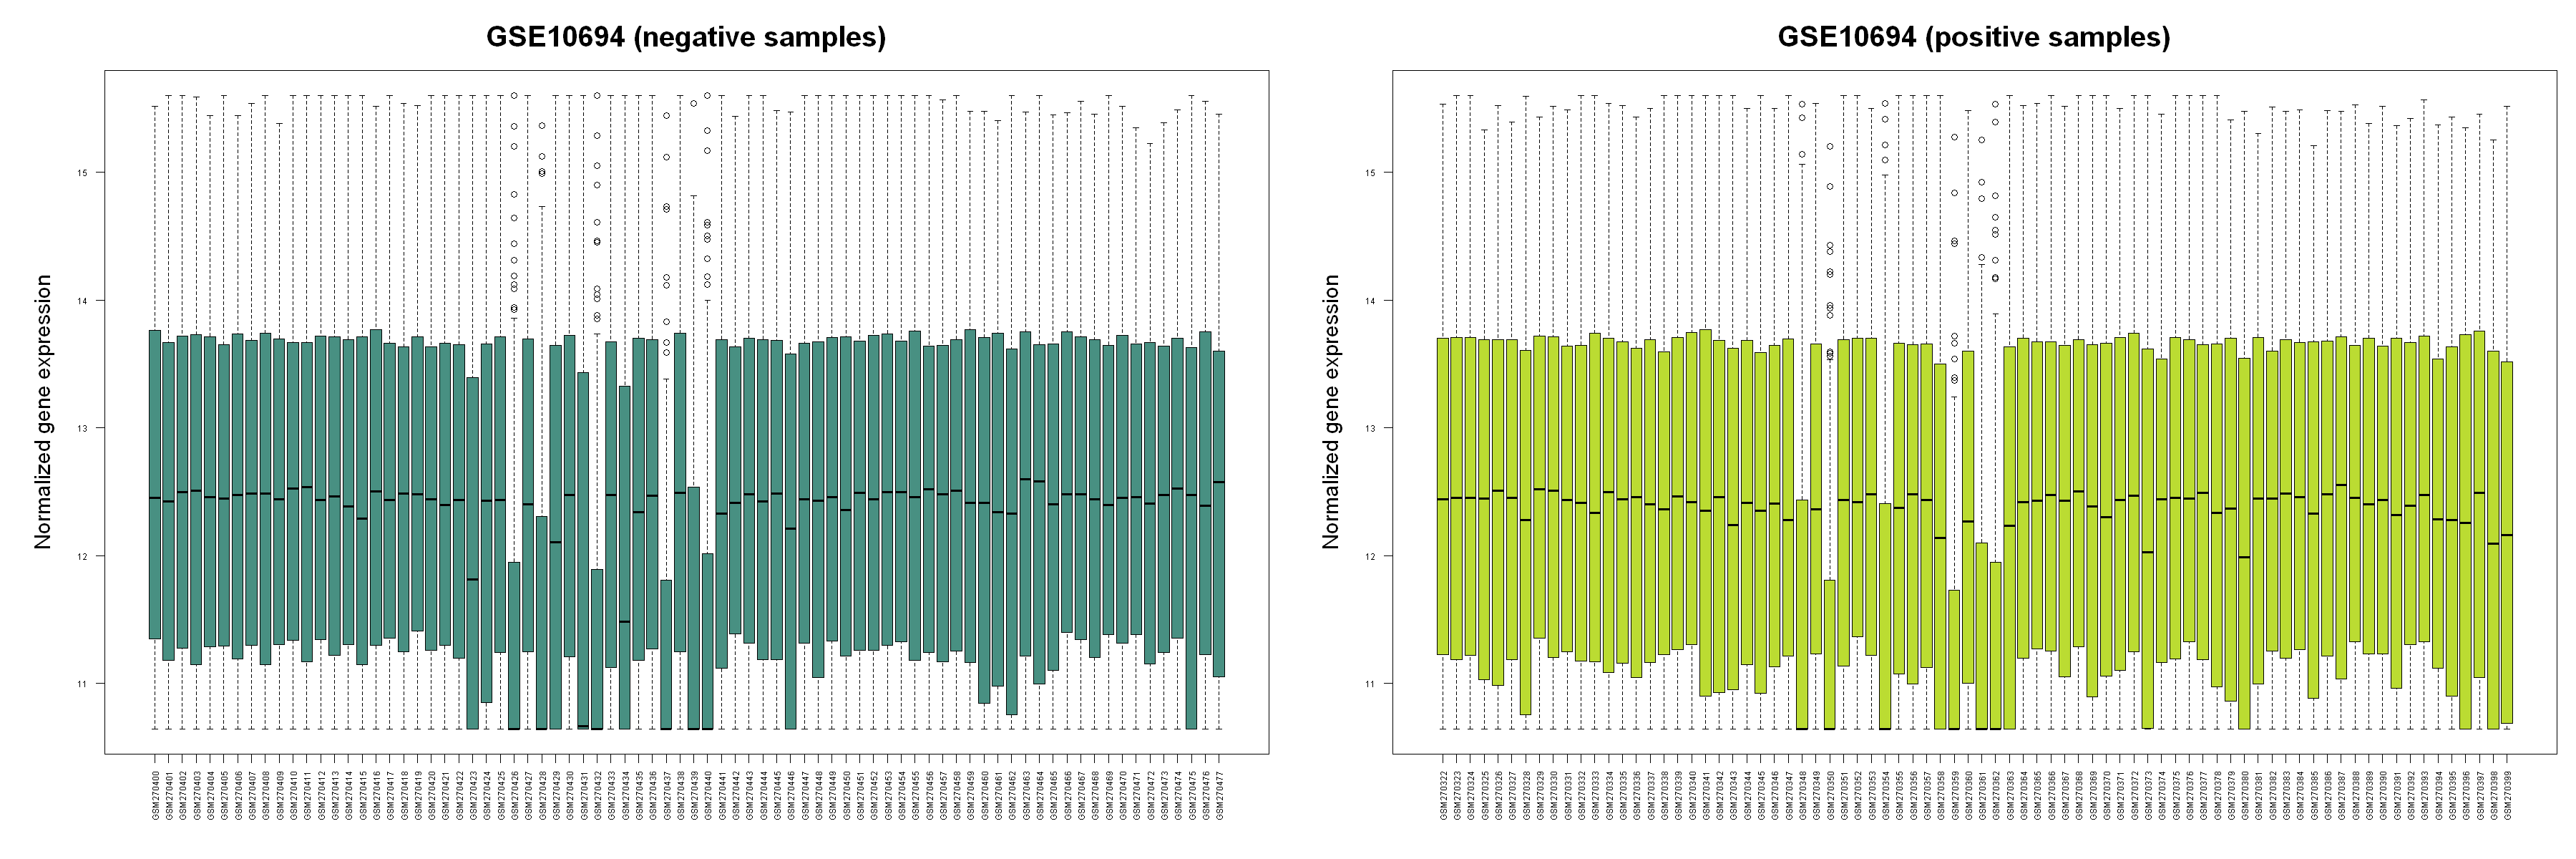

In [8]:
# show boxplots for positive and negative samples separately
#jpeg(file="GSE10694_pos_neg_bf.jpeg", width=1500, height=500)
options(repr.plot.width=30, repr.plot.height=10)
lmts <- range(count.matrix.neg,count.matrix.pos)
par(mfrow = c(1, 2), mar=c(6,6,4,1)+.1)
boxplot(count.matrix.neg, col = "#217867d2", cex.main=2, cex.lab=1.5, cex.axis=0.6, las = 2, main="GSE10694 (negative samples)", ylab="Normalized gene expression")
boxplot(count.matrix.pos, col = "#aad400cd", cex.main=2, cex.lab=1.5, cex.axis=0.6, las = 2, main="GSE10694 (positive samples)", ylab="Normalized gene expression")
#dev.off()

**Filter samples after the normalization**

* Calculate 25% and 75% quantiles across all values in the data set

In [ ]:
# calculate quantiles across all values
GSE10964_quantile_global <- quantile(as.vector(as.matrix(count.matrix)))
q25 <- GSE10964_quantile_global["25%"]
print(paste("25% quantile: ", q25))
q75 <- GSE10964_quantile_global["75%"]
print(paste("75% quantile: ", q75))

* Remove all samples of which the 50% quantile does not lie between 25% and 75% quantiles for the whole data set
* Remove adjacent samples to those that were filtered (do not leave unpaired samples in the data set)

In [ ]:
# calculate column (sample) quantiles
GSE10964_quantile_column <- apply(count.matrix, 2, quantile)

# find samples that do not meet the quality criterion
quantile_filtering <- GSE10964_quantile_column["50%",] >= q25 & GSE10964_quantile_column["50%",] <= q75

# remove paired samples - if one af the pair does not go through the quality control, the paired negative
# or positive sample is removed too
if (length(quantile_filtering) != 0) {
    for (i in 1:length(quantile_filtering)) {
      if (i<=78) {
        if (quantile_filtering[i] == FALSE){
          quantile_filtering[i+78] <- FALSE
          #print(paste("Sample to filter: ", i, ", paired sample:", i+78))
        }
      }
      if (i>=79) {
        if (quantile_filtering[i] == FALSE){
          quantile_filtering[i-78] <- FALSE
          #print(paste("Sample to filter: ", i, ", paired sample:", i+78))
        }
      }
    }
}

print("Samples to remove: ")
for (i in 1:length(quantile_filtering)) {
    if (quantile_filtering[i] == FALSE) {
    print(colnames(count.matrix)[i])
    }
}

**Remove above-listed samples**

In [ ]:
# filter the count matrix
print(paste("Number of samples before quality control: ", ncol(count.matrix)))
count.matrix.f <- count.matrix[, quantile_filtering]
print(paste("Number of samples after quality control: ", ncol(count.matrix.f)))

if (length(quantile_filtering) != 0) {
    # counting removed samples in positive and negative class
    quantile_filtering_neg <- quantile_filtering[1:78]
    count_neg_removed <- sum(quantile_filtering_neg==FALSE)
    quantile_filtering_pos <- quantile_filtering[79:156]
    count_pos_removed <- sum(quantile_filtering_pos==FALSE)

    # removal from the separate negative sample and positive sample count matrix
    count.matrix.neg.f <- count.matrix.neg[, quantile_filtering_neg]
    count.matrix.pos.f <- count.matrix.pos[, quantile_filtering_pos]

    #assign annotation
    neg_samples <- 78 - count_neg_removed
    pos_samples <- 78 - count_pos_removed
    annotationneg <- rep(0, neg_samples)
    annotationpos <- rep(1, pos_samples)
    annotation <- c(annotationneg, annotationpos)
} else {
    count.matrix.neg.f <- count.matrix.neg
    count.matrix.pos.f <- count.matrix.pos
}

**Show boxplot for all samples after filtering**

In [ ]:
# show boxplot for all samples**Show boxplot for all samples**
sample.names <- rep()
options(repr.plot.width=27, repr.plot.height=9)
# jpeg(file="GSE10694_all.jpeg", width=1500, height=500)
boxplot(count.matrix.f, col = "#AEB6BF", cex.main=2, cex.lab=1.5, cex.axis=0.6, las = 2, main="GSE10694 after quality control", ylab="Normalized gene expression")
# dev.off()

**Show boxplots for positive and negative samples separately after filtering**

In [ ]:
# show boxplots for positive and negative samples separately
# jpeg(file="GSE10694_pos_neg.jpeg", width=1500, height=500)
options(repr.plot.width=30, repr.plot.height=10)
lmts <- range(count.matrix.neg.f, count.matrix.pos.f)
par(mfrow = c(1, 2), mar=c(6,6,4,1)+.1)
boxplot(count.matrix.neg.f, col = "#217867d2", cex.main=2, cex.lab=1.5, cex.axis=0.6, las = 2, main="GSE10694 after quality control (negative samples)", ylab="Normalized gene expression")
boxplot(count.matrix.pos.f, col = "#aad400cd", cex.main=2, cex.lab=1.5, cex.axis=0.6, las = 2, main="GSE10694 after quality control (positive samples)", ylab="Normalized gene expression")
# dev.off()

**Filter non-human and *-miRNAs (non dominant product)**

Note, in terms of *-miRNAs we remove all miRNAs that have * in their IDs. We do not screen the sequences against miRNA data bases. Please, prepare your own data accordingly to your needs.

In [ ]:
# remove non-human miRNAs
count.matrix.f <- count.matrix.f[c(grep("hsa*", rownames(count.matrix.f))),]
non.human.data.row.numb <- nrow(count.matrix.f)
print(paste("Removed non-human features:", original.data.row.numb-non.human.data.row.numb))
print(paste("Number of features: ", non.human.data.row.numb))

# remove *-miRNAs
count.matrix.f <- count.matrix.f[c(-grep("\\*", rownames(count.matrix.f))),]
print(paste("Removed * features:", non.human.data.row.numb-nrow(count.matrix.f)))
print(paste("Number of features: ", nrow(count.matrix.f)))

#separate into negative and positive samples
count.matrix.neg.f <- count.matrix.f[,1:length(colnames(count.matrix.neg.f))]
count.matrix.pos.f <- count.matrix.f[,(length(colnames(count.matrix.neg.f))+1):length(colnames(count.matrix.f))]

**Show boxplot for all samples after filtering**

In [ ]:
# show boxplot for all samples**Show boxplot for all samples**
sample.names <- rep()
options(repr.plot.width=27, repr.plot.height=9)
# jpeg(file="GSE10694_all.jpeg", width=1500, height=500)
boxplot(count.matrix.f, col = "#AEB6BF", cex.main=2, cex.lab=1.5, cex.axis=0.6, las = 2, main="GSE10694 after miRNA filtering", ylab="Normalized gene expression")
# dev.off()

**Show boxplots for positive and negative samples separately after filtering**

In [ ]:
# show boxplots for positive and negative samples separately
# jpeg(file="GSE10694_pos_neg.jpeg", width=1500, height=500)
options(repr.plot.width=30, repr.plot.height=10)
lmts <- range(count.matrix.neg.f, count.matrix.pos.f)
par(mfrow = c(1, 2), mar=c(6,6,4,1)+.1)
boxplot(count.matrix.neg.f, col = "#217867d2", cex.main=2, cex.lab=1.5, cex.axis=0.6, las = 2, main="GSE10694 after quality control (negative samples)", ylab="Normalized gene expression")
boxplot(count.matrix.pos.f, col = "#aad400cd", cex.main=2, cex.lab=1.5, cex.axis=0.6, las = 2, main="GSE10694 after quality control (positive samples)", ylab="Normalized gene expression")
# dev.off()

**Format data and save as .csv**

In [ ]:
# format data
original_ids <- colnames(count.matrix.f)
new_ids <- seq(1,length(colnames(count.matrix.f)), 1)
sample.info <- data.frame(original_ids, new_ids ,annotation)
write.table(sample.info, paste("GSE10694", "_sample_info.csv", sep=""),  sep = ";", row.names = FALSE, quote=FALSE)
colnames(count.matrix.f) <- seq(1,length(colnames(count.matrix.f)), 1)

transformed.data.set <- transform_data(annotation, count.matrix.f)
head(transformed.data.set)

data.set.name = paste("GSE10694", ".csv", sep="", collapse = NULL)

write.table(transformed.data.set, data.set.name,  sep = ";", row.names = FALSE, quote=FALSE)